The mean field induction equation is given by:
     $$\frac{\partial \bar{B}}{\partial t}=\nabla \times (\bar{V}\times\bar{B}+\epsilon -\eta\nabla\times\bar{B})$$


Taking the first order smoothing approximation we can write $\epsilon=\alpha\bar{B}-\eta_t\nabla\times\bar{B}$
$$\frac{\partial B}{\partial t}=\nabla \times (\bar{V}\times\bar{B}+\alpha\bar{B} -(\eta_t+\eta)\nabla\times\bar{B})$$
If we ignore the magnetic induction term and the alpha term diffusion equation can be writen as:
    $$\frac{\partial B}{\partial t}=-\nabla \times \beta\nabla \times \bar{B}$$
where $\beta=\eta_t+\eta$.
If we assume beta to be independent of position we can write:
    $$\beta\nabla \times \nabla \times \bar{B}=\beta\left[\nabla(\nabla\cdot \bar{B})-\nabla^2 \bar{B}\right]$$
We know from maxwell's eqautions that $\nabla\cdot B=0$
This leaves us with 
 $$\frac{\partial B}{\partial t}=\beta\nabla^2 \bar{B}$$
Writing the above equation componenet wise we get:
$$ \frac{\partial \bar{B}_r}{\partial t}=\beta\frac{1}{r^2}\frac{\partial}{\partial \phi ^2}\left(\bar{B}_r\right)-\frac{2}{r^2}\frac{\partial \bar{B}_\phi}{\partial \phi}+\beta \frac{\partial^2 \bar{B}_r}{\partial z^2}+\beta \frac{\partial}{\partial r}\left[\frac{1}{r} \frac{\partial}{\partial r}\left(r \bar{B}_r\right)\right],$$
$$ \frac{\partial \bar{B}_\phi}{\partial t}=\beta\frac{1}{r^2}\frac{\partial}{\partial \phi ^2}\left(\bar{B}_\phi\right)+\frac{2}{r^2}\frac{\partial \bar{B}_\phi}{\partial \phi}+\beta \frac{\partial^2 \bar{B}_\phi}{\partial z^2}+\beta \frac{\partial}{\partial r}\left[\frac{1}{r} \frac{\partial}{\partial r}\left(r \bar{B}_\phi\right)\right],$$
$$\frac{\partial \bar{B}_z}{\partial t}=\beta\frac{1}{r^2}\frac{\partial}{\partial \phi ^2}\left(\bar{B}_z\right)+\beta \frac{\partial^2 \bar{B}_z}{\partial z^2}+\beta \frac{\partial}{\partial r}\left[\frac{1}{r} \frac{\partial}{\partial r}\left(r \bar{B}_z\right)\right],$$
Assuming $\bar{B}$ to be axisymmetric all terms with $\frac{\partial}{\partial\phi}$ are zero<br>
Given my project was to solve for variation of B along z I will also be neglecting all $\frac{\partial}{\partial r}$ which gives us the following three equations
$$\frac{\partial \bar{B}_r}{\partial t}=\beta\frac{\partial^2 \bar{B}_r}{\partial z^2},\qquad \frac{\partial \bar{B}_\phi}{\partial t}=\beta\frac{\partial^2 \bar{B}_\phi}{\partial z^2},\qquad \frac{\partial \bar{B}_z}{\partial t}=\beta\frac{\partial^2 \bar{B}_z}{\partial z^2}$$
Given maxwell's equation for 
Let's define $\bar{B}_{total}=\bar{B}_r+\bar{B}_\phi$ we would be finding the variation of $\bar{B}_{total}$ with time
To numerically solve this equation I will be using the Crank Nickolson method which is a combination of explicit and implicit meathods with which has the advantage of being unconditionally stable with with an error of $\mathcal{O}(k^2)+\mathcal{O}(h^2)$ where k and h are the time step and spatial step size respectively.
In matrix form Crank–Nicolson Method can be written as:
$$Au_j=Bu_{j-1}+sigma*(s_{j-1}+s_j)$$


# Defining Functions

Importing Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget
from scipy.stats import linregress
import warnings
# warnings.simplefilter(action='ignore', category=RuntimeWarning)

Defining the Crank Nicolson Function

In [2]:
def crank_nicolson(u0, dx, dt, T,D):
    """
    u0: initial condition, a function of x
    dx: space step size
    dt: time step size
    T: total time upto which integration is to be done
    """
    N = int(T/dt)
    J = len(u0)
    u = np.empty((N+1, J))
    u[0] = u0
    sigma = D*dt / (dx**2)

    # Construct the tridiagonal matrices
    A=np.diag(2+2*sigma*np.ones(J))+np.diag(-sigma* np.ones(J-1), -1)+np.diag(-sigma* np.ones(J-1), 1)
    B=np.diag(2-2*sigma*np.ones(J))+np.diag(sigma* np.ones(J-1), -1)+np.diag(sigma* np.ones(J-1), 1)
    # A[0, 0] = 1 + sigma
    # B[0, 0] = 1 - sigma
    # A[-1, -1] = 1 + sigma
    # B[-1, -1] = 1 - sigma
    # Iterating for each time step
    for n in range(N):
        b = u[n]
        # print(n)
        u[n+1] =  np.linalg.solve(A, np.dot(B, b))
        u[n+1, 0] = u[n, 0]
        u[n+1, -1] = u[n, -1]
    return u

Calculating pitch angle

In [3]:
def b_total_pitch(B_r,B_phi):
    return np.sqrt(B_r**2+B_phi**2), np.where(np.abs(B_r) > 1e-1, np.arctan(B_phi/B_r)*180/np.pi, 90)

Calculating decay factor gamma

In [4]:
def decay_factor(B_t,t):
    log_B_t=np.log(B_t)
    # Plot log_B_t vs t

    fig2=plt.figure()
    plt.plot(t, log_B_t, label='log_B_t')

    # Fit a line to the last 100 data points
    slope, intercept, _, _, _ = linregress(t[-10:], log_B_t[-10:])
    fitted_line = slope * t[-10:] + intercept

    # Plot the fitted line
    plt.plot(t[-10:], fitted_line, label='Fitted Line')

    # Set labels and title
    plt.xlabel('t')
    plt.ylabel(r'$log(B_{total})$')
    plt.title(r'Plot of $log(B_{total})$ vs t')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

    return slope

# Applying specific Boundary Conditions

## 1) $B_{0r}=\frac{3z}{z_{max}}+sin\left(\frac{3z}{z_{max}}\right)e^{-(\frac{3z}{z_{max}})^2}$
## $\;\;\,$ $B_{0\phi}=sin\left(\frac{\pi z}{z_{max}}\right)$

Boundary conditions resolution and other parameters

In [5]:
#Spatial resolution and spatial domain
z_min = -300 #pc
z_max = 300 #pc
dz = 3 #pc
#Array of all spatial points
z = np.arange(z_min, z_max + dz, dz)
#Time resolution and time upto which integration is to be done
t_f=100 #Myr
dt=1 #Myr

t = np.arange(0, t_f, dt)
#Initial condition
B0_R=((3*z/z_max) + np.sin(3*z/z_max)) * np.exp(-(3*z/z_max)**2.0)
B0_PHI=np.sin(np.pi*(z/z_max))
#Diffusion parameter
D=340

Plotting seed magnetic field

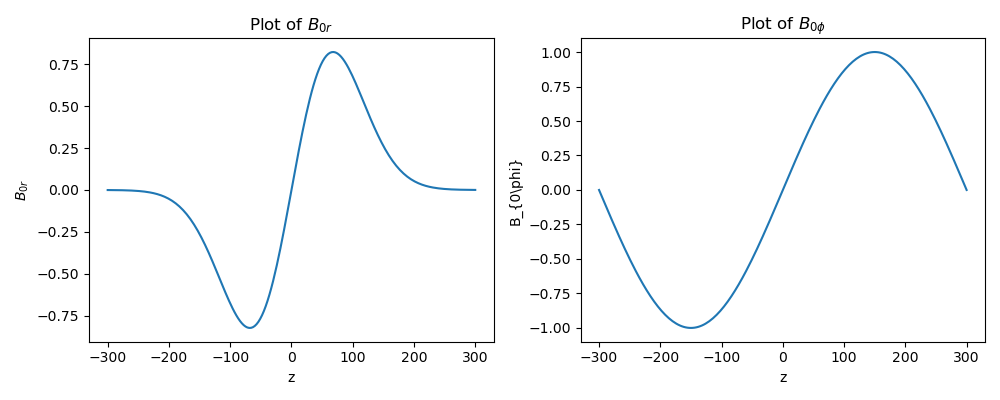

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[10, 4])

# Plot of B0_R
axs[0].plot(z, B0_R)
axs[0].set_xlabel('z')
axs[0].set_ylabel(r'$B_{0r}$')
axs[0].set_title(r'Plot of $B_{0r}$')

# Plot of B0_PHI
axs[1].plot(z, B0_PHI)
axs[1].set_xlabel('z')
axs[1].set_ylabel(r'B_{0\phi}')
axs[1].set_title(r'Plot of $B_{0\phi}$')

plt.tight_layout()
plt.show()

C:\Users\oomme\AppData\Local\Temp\ipykernel_2572\2250905510.py:2: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(B_r**2+B_phi**2), np.where(np.abs(B_r) > 1e-1, np.arctan(B_phi/B_r)*180/np.pi, 90)


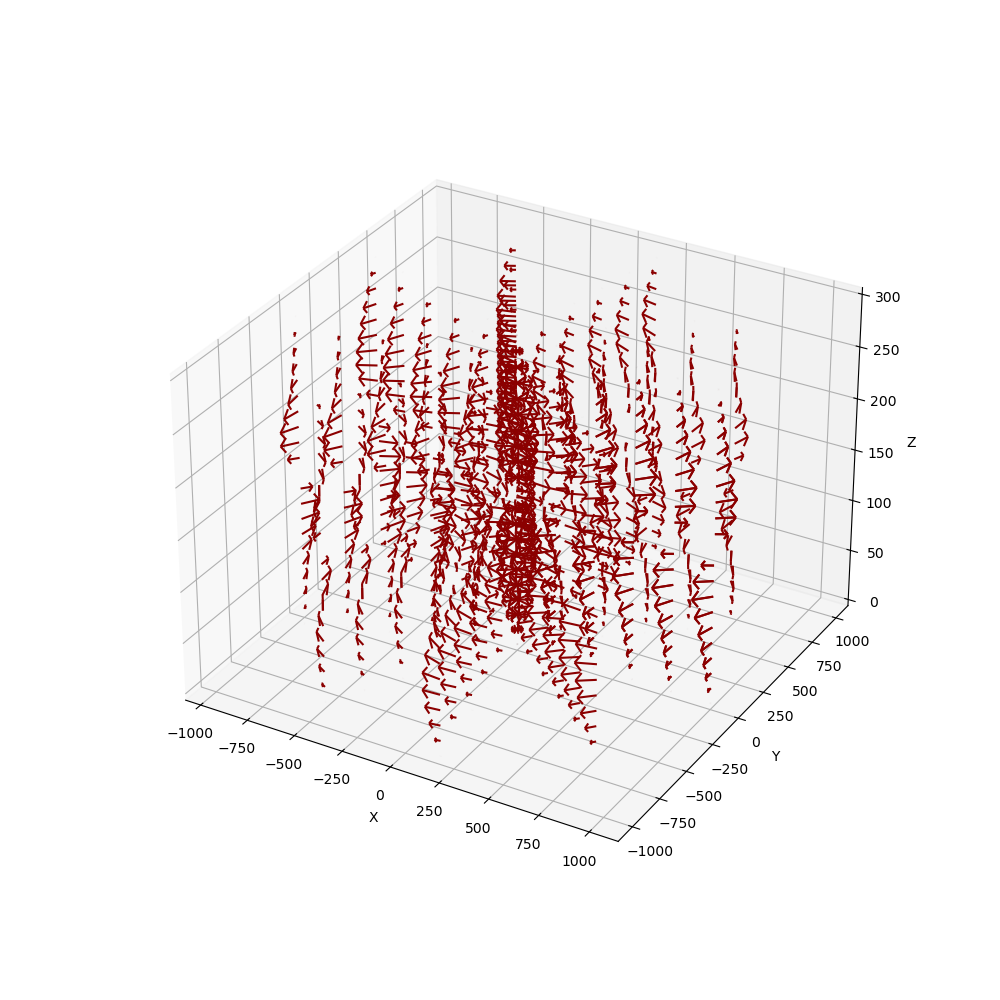

In [7]:
#No of points where vectors have to be shown in R,Phi,z
pl_res=(6,10,20)

# Assuming B_total and pitch_angles are your arrays
B_total,pitch_angles=b_total_pitch(B0_R,B0_PHI) # random pitch angles between 0 and pi/2


B_3d_phi = np.tile(B0_PHI[::int(len(B0_PHI)/pl_res[2])], (pl_res[0], pl_res[1], 1))
B_3d_r = np.tile(B0_R[::int(len(B0_PHI)/pl_res[2])], (pl_res[0], pl_res[1], 1))
B_3d_z = np.zeros_like(B_3d_r)
B_3d_total= np.tile(B_total, (pl_res[0], pl_res[1], 1))
# Define the grid in r, phi, z
r = np.linspace(0, 1000, B_3d_r.shape[0])
phi = np.linspace(0, 2*np.pi, B_3d_phi.shape[1])
z = np.linspace(0, 300, B_3d_z.shape[2])
r, phi, z = np.meshgrid(r, phi, z, indexing='ij')

# Convert to Cartesian coordinates
x = r * np.cos(phi)
y = r * np.sin(phi)

# Convert B_3d_r, B_3d_phi to Cartesian components
B_3d_x = B_3d_r * np.cos(phi) - B_3d_phi * np.sin(phi)
B_3d_y = B_3d_r * np.sin(phi) + B_3d_phi * np.cos(phi)

# Create 3D plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
# Compute magnitudes for scaling
B_magnitude = np.max(np.sqrt(B_3d_x ** 2 + B_3d_y ** 2 + B_3d_z ** 2))

# Scale components by magnitude for variable lengths
scale_factor = 100  # Adjust this factor for desired length scaling

B_3d_x_scaled = B_3d_x / B_magnitude * scale_factor
B_3d_y_scaled = B_3d_y / B_magnitude * scale_factor
B_3d_z_scaled = B_3d_z / B_magnitude * scale_factor

ax.quiver(x, y, z, B_3d_x_scaled, B_3d_y_scaled, B_3d_z_scaled,linewidth=1.5,color='darkred')
# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

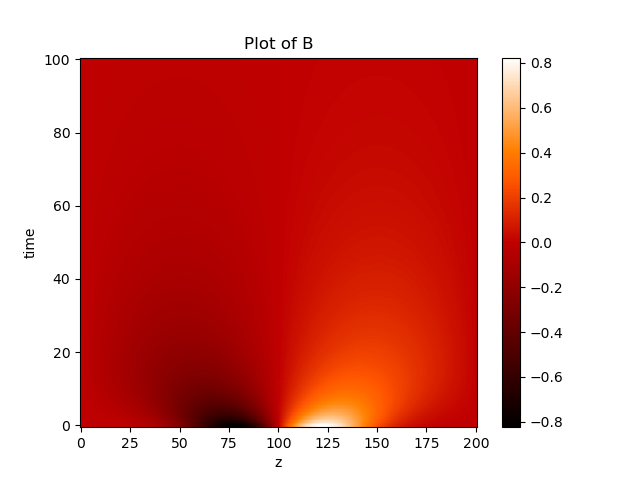

In [8]:
B_R = crank_nicolson(B0_R, dz, dt, t_f,D)
fig1=plt.figure()
plt.imshow(B_R, cmap='gist_heat', origin='lower', aspect='auto')
plt.colorbar()
plt.xlabel('z')
plt.ylabel('time')
plt.title('Plot of B')
plt.show()


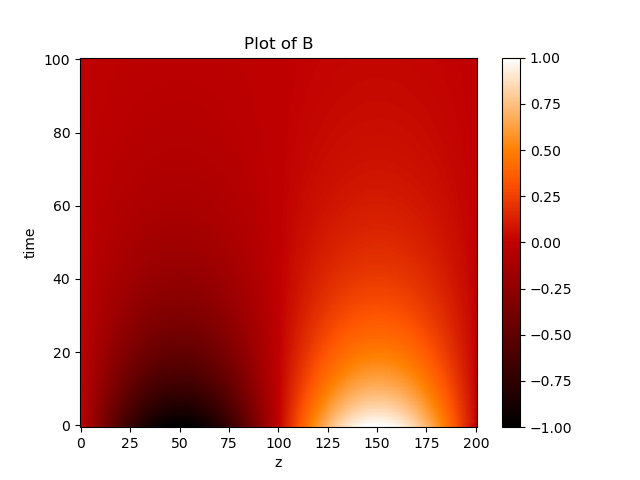

In [9]:
B_PHI = crank_nicolson(B0_PHI, dz, dt, t_f,D)
fig1=plt.figure()
plt.imshow(B_PHI, cmap='gist_heat', origin='lower', aspect='auto')
plt.colorbar()
plt.xlabel('z')
plt.ylabel('time')
plt.title('Plot of B')
plt.show()

C:\Users\oomme\AppData\Local\Temp\ipykernel_2572\2250905510.py:2: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(B_r**2+B_phi**2), np.where(np.abs(B_r) > 1e-1, np.arctan(B_phi/B_r)*180/np.pi, 90)


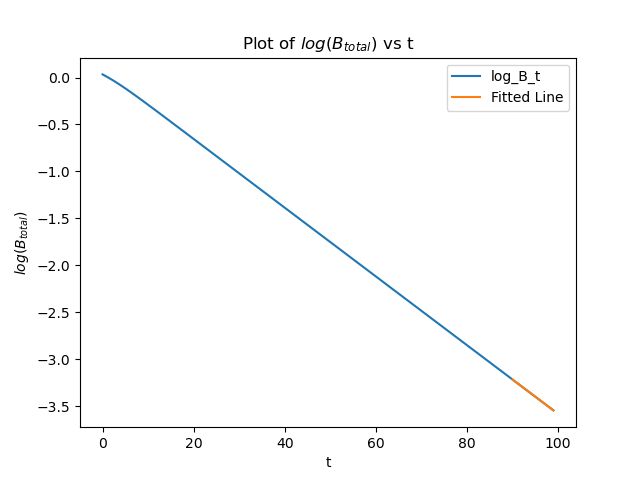

Decay factor gamma for B  0.0365846395634391


In [10]:
B_total,_=b_total_pitch(B_R,B_PHI)
gamma=decay_factor(B_total[:,50][:-1],t)
# Show the plot
# plt.show()
print("Decay factor gamma for B ",-gamma)

## 2) $B_{0r}=\frac{3z}{z_{max}}+sin\left(\frac{3z}{z_{max}}\right)e^{-(\frac{3z}{z_{max}})^2}$
## $\;\;\,$ $B_{0\phi}=sin\left(\frac{\pi z}{z_{max}}\right)$

Boundary conditions resolution and other parameters

In [11]:
#Spatial resolution and spatial domain
z_min = -300 #pc
z_max = 300 #pc
dz = 3 #pc
#Array of all spatial points
z = np.arange(z_min, z_max + dz, dz)
#Time resolution and time upto which integration is to be done
t_f=100 #Myr
dt=1 #Myr

t = np.arange(0, t_f, dt)
#Initial condition
B0_R=((3*z/z_max) + np.sin(3*z/z_max)) * np.exp(-(3*z/z_max)**2.0)
B0_PHI=np.sin(np.pi*(z/z_max))
#Diffusion parameter
D=340

Plotting seed magnetic field

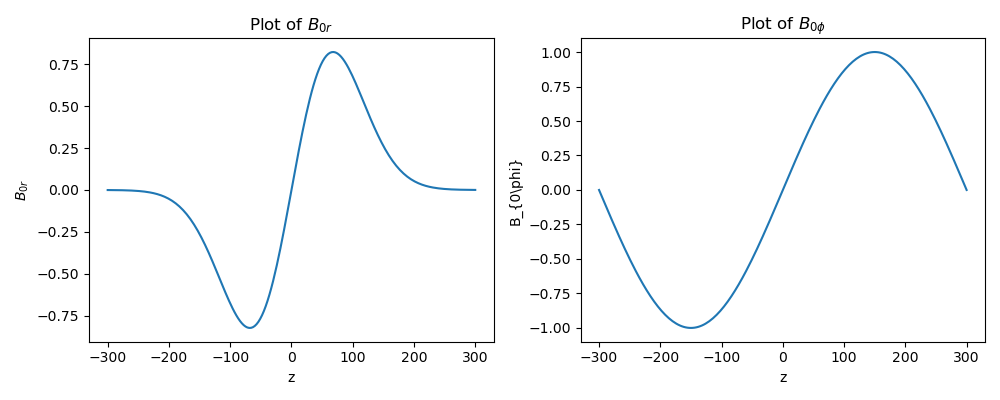

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot of B0_R
axs[0].plot(z, B0_R)
axs[0].set_xlabel('z')
axs[0].set_ylabel(r'$B_{0r}$')
axs[0].set_title(r'Plot of $B_{0r}$')

# Plot of B0_PHI
axs[1].plot(z, B0_PHI)
axs[1].set_xlabel('z')
axs[1].set_ylabel(r'B_{0\phi}')
axs[1].set_title(r'Plot of $B_{0\phi}$')

plt.tight_layout()
plt.show()

C:\Users\oomme\AppData\Local\Temp\ipykernel_2572\2250905510.py:2: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(B_r**2+B_phi**2), np.where(np.abs(B_r) > 1e-1, np.arctan(B_phi/B_r)*180/np.pi, 90)


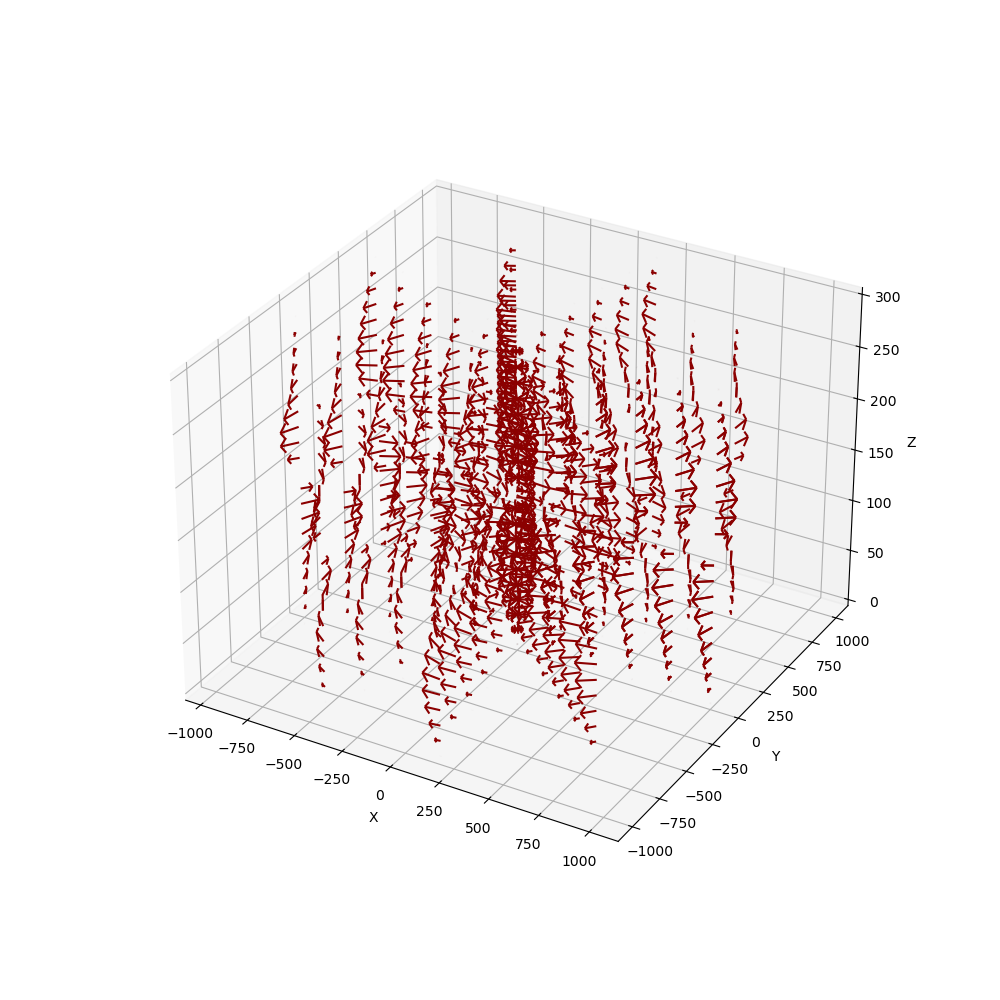

In [13]:
#No of points where vectors have to be shown in R,Phi,z
pl_res=(6,10,20)

# Assuming B_total and pitch_angles are your arrays
B_total,pitch_angles=b_total_pitch(B0_R,B0_PHI) # random pitch angles between 0 and pi/2


B_3d_phi = np.tile(B0_PHI[::int(len(B0_PHI)/pl_res[2])], (pl_res[0], pl_res[1], 1))
B_3d_r = np.tile(B0_R[::int(len(B0_PHI)/pl_res[2])], (pl_res[0], pl_res[1], 1))
B_3d_z = np.zeros_like(B_3d_r)
B_3d_total= np.tile(B_total, (pl_res[0], pl_res[1], 1))
# Define the grid in r, phi, z
r = np.linspace(0, 1000, B_3d_r.shape[0])
phi = np.linspace(0, 2*np.pi, B_3d_phi.shape[1])
z = np.linspace(0, 300, B_3d_z.shape[2])
r, phi, z = np.meshgrid(r, phi, z, indexing='ij')

# Convert to Cartesian coordinates
x = r * np.cos(phi)
y = r * np.sin(phi)

# Convert B_3d_r, B_3d_phi to Cartesian components
B_3d_x = B_3d_r * np.cos(phi) - B_3d_phi * np.sin(phi)
B_3d_y = B_3d_r * np.sin(phi) + B_3d_phi * np.cos(phi)

# Create 3D plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
# Compute magnitudes for scaling
B_magnitude = np.max(np.sqrt(B_3d_x ** 2 + B_3d_y ** 2 + B_3d_z ** 2))

# Scale components by magnitude for variable lengths
scale_factor = 100  # Adjust this factor for desired length scaling

B_3d_x_scaled = B_3d_x / B_magnitude * scale_factor
B_3d_y_scaled = B_3d_y / B_magnitude * scale_factor
B_3d_z_scaled = B_3d_z / B_magnitude * scale_factor

ax.quiver(x, y, z, B_3d_x_scaled, B_3d_y_scaled, B_3d_z_scaled,linewidth=1.5,color='darkred')
# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

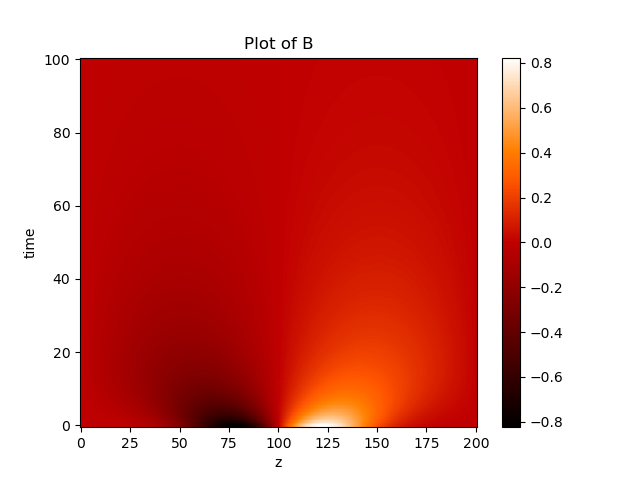

In [14]:
B_R = crank_nicolson(B0_R, dz, dt, t_f,D)
fig1=plt.figure()
plt.imshow(B_R, cmap='gist_heat', origin='lower', aspect='auto')
plt.colorbar()
plt.xlabel('z')
plt.ylabel('time')
plt.title('Plot of B')
plt.show()


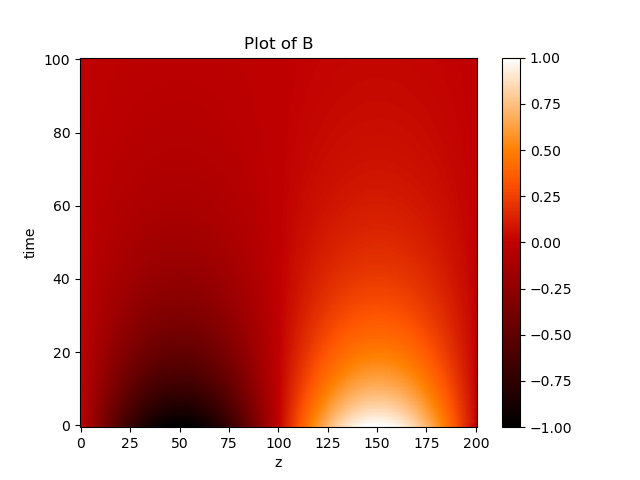

In [15]:
B_PHI = crank_nicolson(B0_PHI, dz, dt, t_f,D)
fig1=plt.figure()
plt.imshow(B_PHI, cmap='gist_heat', origin='lower', aspect='auto')
plt.colorbar()
plt.xlabel('z')
plt.ylabel('time')
plt.title('Plot of B')
plt.show()

C:\Users\oomme\AppData\Local\Temp\ipykernel_2572\2250905510.py:2: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(B_r**2+B_phi**2), np.where(np.abs(B_r) > 1e-1, np.arctan(B_phi/B_r)*180/np.pi, 90)


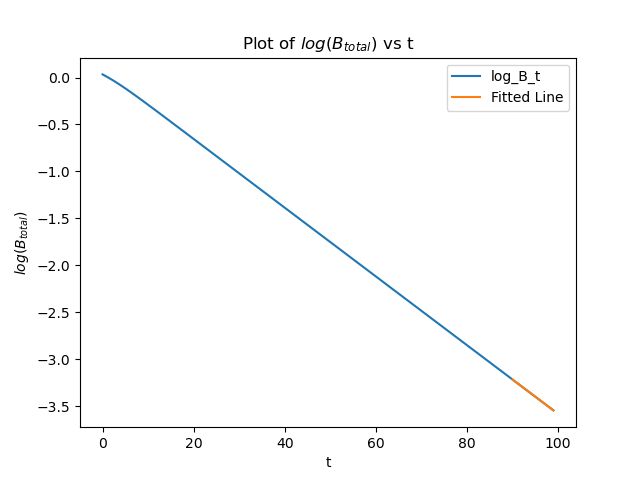

Decay factor gamma for B  0.0365846395634391


In [16]:
B_total,_=b_total_pitch(B_R,B_PHI)
gamma=decay_factor(B_total[:,50][:-1],t)
# Show the plot
# plt.show()
print("Decay factor gamma for B ",-gamma)